In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
ps = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
ps

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
ps = ps.dropna()
ps

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
obj = (ps.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


In [5]:
ps.drop(['Loan_ID'],axis=1,inplace=True)

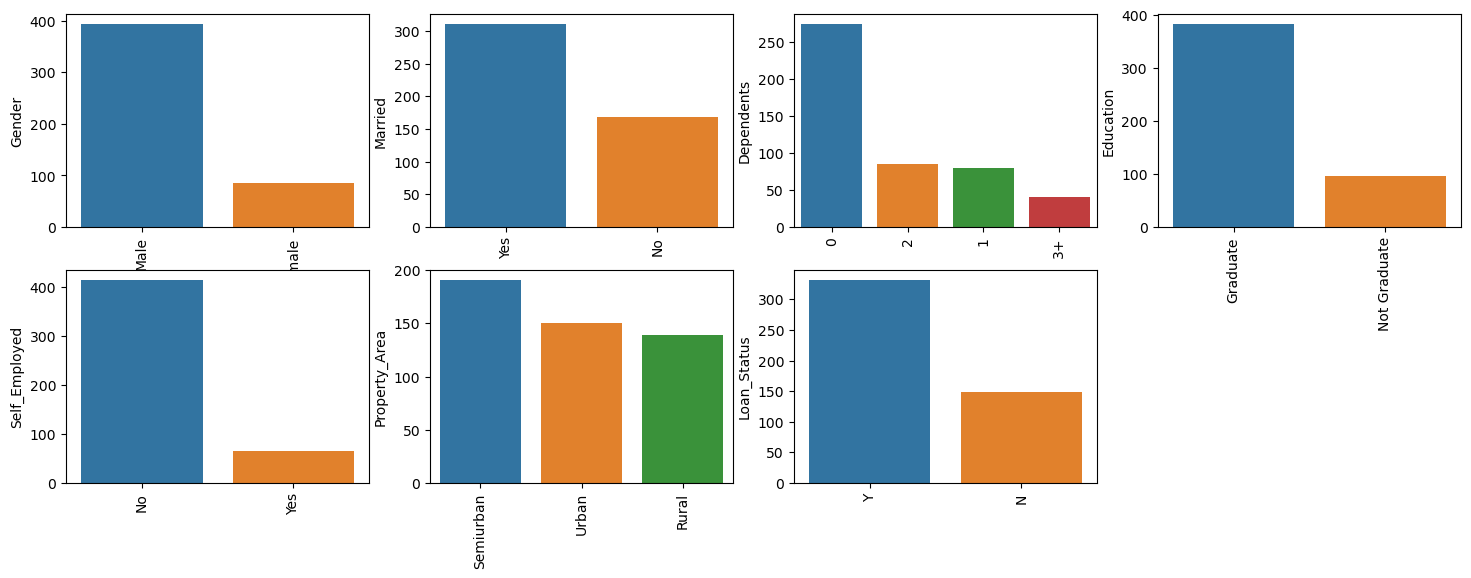

In [6]:
obj = (ps.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = ps[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation = 90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
obj = (ps.dtypes == 'object')
for col in list(obj[obj].index):
    ps[col] = label_encoder.fit_transform(ps[col])

In [8]:
obj = ps.dtypes == 'object'
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<AxesSubplot:>

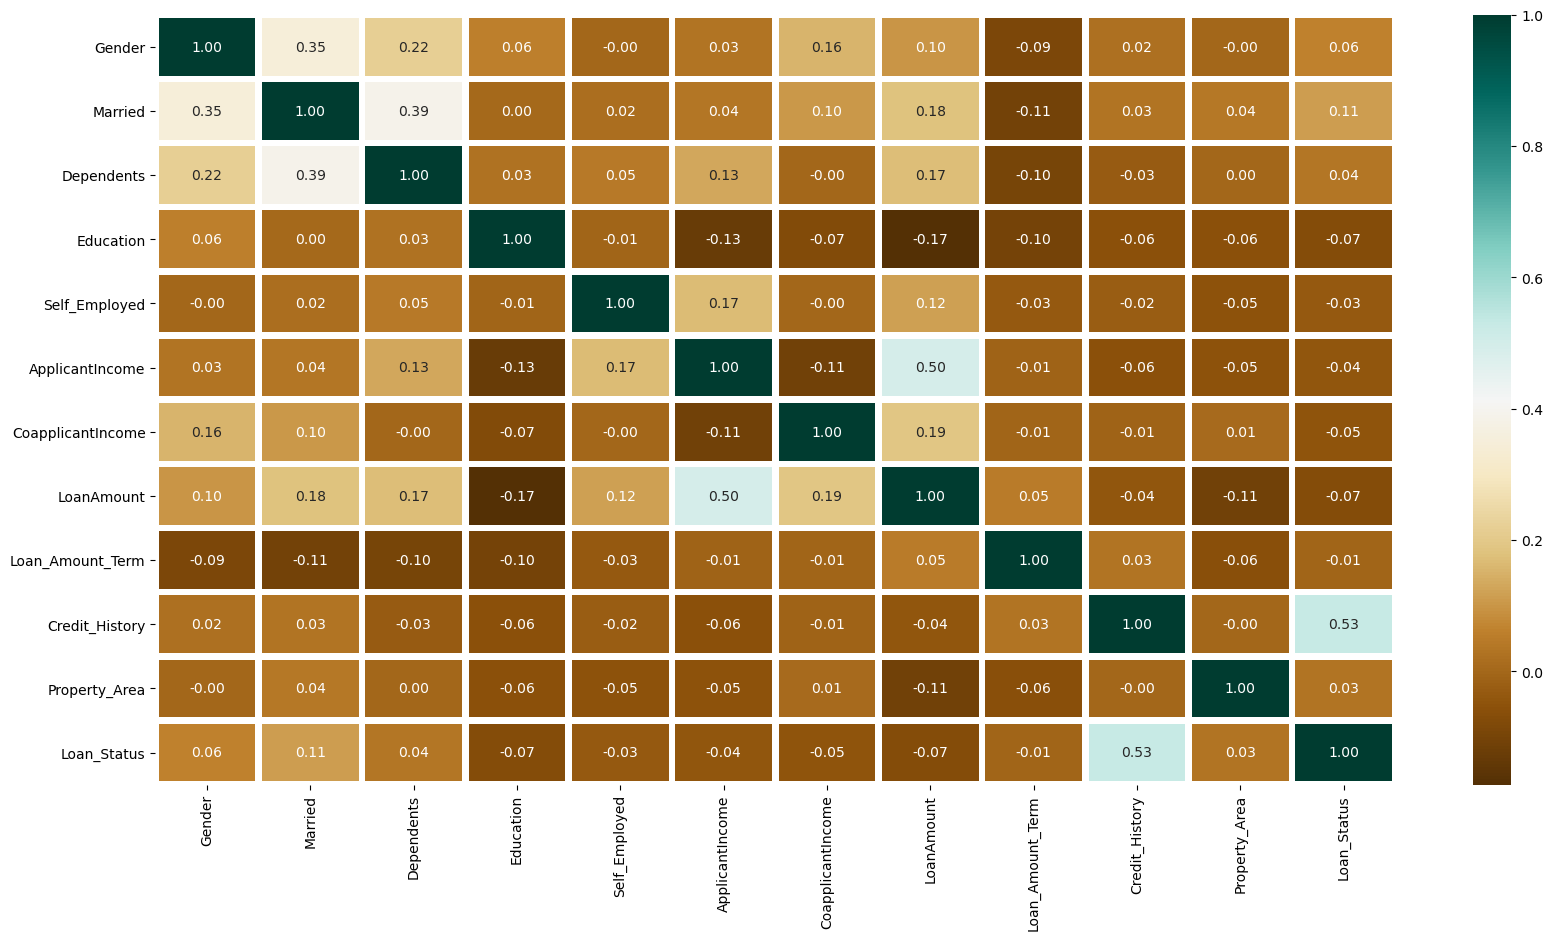

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(ps.corr(),cmap='BrBG',fmt='.2f',linewidths=4,annot=True)

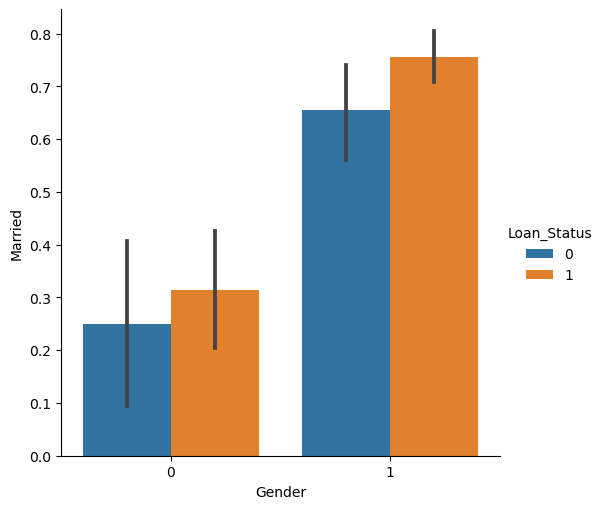

In [10]:
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=ps)

In [11]:
for col in ps.columns:
    ps[col] = ps[col].fillna(ps[col].mean()) 
    
ps.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X = ps.drop(['Loan_Status'],axis=1)
Y = ps['Loan_Status']
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((288, 11), (192, 11), (288,), (192,))

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state = 7)
svc = SVC()
lc = LogisticRegression()

for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of",clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_train,Y_pred))

Accuracy score of RandomForestClassifier = 97.56944444444444
Accuracy score of KNeighborsClassifier = 78.47222222222221
Accuracy score of SVC = 70.48611111111111
Accuracy score of LogisticRegression = 81.59722222222221


In [14]:
for clf in (rfc, knn, svc, lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of",clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_test,Y_pred))

Accuracy score of RandomForestClassifier = 74.47916666666666
Accuracy score of KNeighborsClassifier = 60.9375
Accuracy score of SVC = 68.75
Accuracy score of LogisticRegression = 80.72916666666666
